HeartDisease
1    508
0    410
Name: count, dtype: int64
Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Statistiques descriptives :

Valeurs manquantes :
Age               0
Sex               0
ChestPainType     0
Res

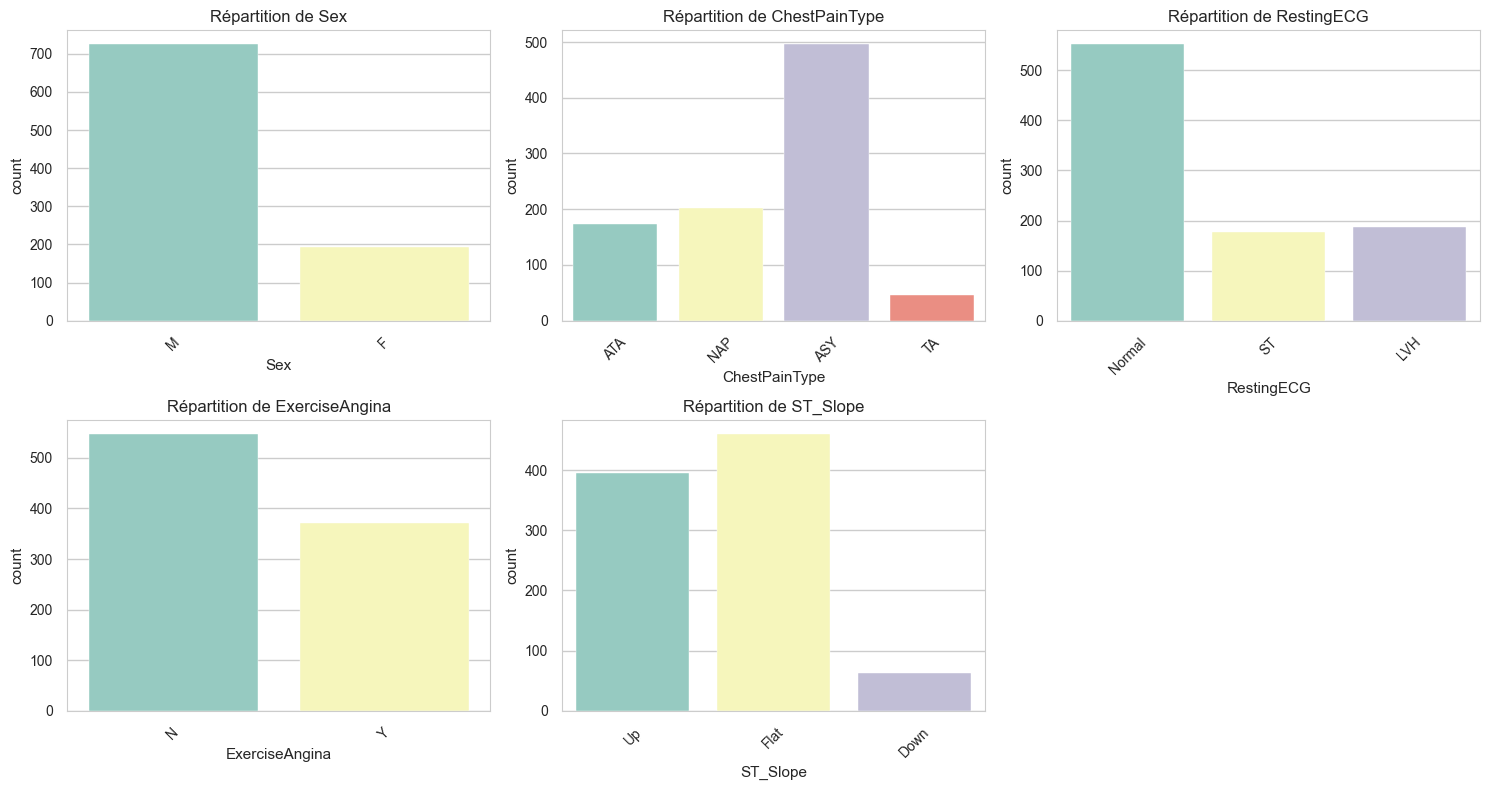

KeyError: <Axes: >

In [14]:
import DataCleaning as DC
DC.initialize_libraries()

### CRÉATION DE CARACTÉRISTIQUES D'INTERACTION 

In [15]:
# Fonction pour créer des interactions entre variables
def create_interactions(df, num_features):
    interactions = {}
    # Créer des interactions multiplicatives entre paires de variables numériques
    for i, feat1 in enumerate(num_features):
        for feat2 in num_features[i+1:]:
            interaction_name = f"{feat1}_x_{feat2}"
            interactions[interaction_name] = df[feat1] * df[feat2]
    
    # Créer des ratios pour certaines paires intéressantes
    important_ratios = [
        ('MaxHR', 'Age', 'MaxHR_div_Age'),  # Ratio fréquence cardiaque max / âge
        ('Cholesterol', 'Age', 'Chol_div_Age'),  # Cholestérol normalisé par âge
        ('RestingBP', 'Age', 'BP_div_Age')  # Pression artérielle normalisée par âge
    ]
    
    for num, denom, name in important_ratios:
        if num in df.columns and denom in df.columns:
            interactions[name] = df[num] / df[denom].replace(0, 1)  # Éviter division par zéro
    
    return pd.DataFrame(interactions)

# Créer des interactions pour l'ensemble d'entraînement et de test
X_train_interactions = create_interactions(DC.X_train, DC.num_features)
X_test_interactions = create_interactions(DC.X_test, DC.num_features)

# Ajouter les interactions aux données d'origine
X_train_with_interactions = pd.concat([DC.X_train, X_train_interactions], axis=1)
X_test_with_interactions = pd.concat([DC.X_test, X_test_interactions], axis=1)

# Obtenir la liste de toutes les variables après ajout des interactions
all_features = list(X_train_with_interactions.columns)
interaction_features = list(X_train_interactions.columns)

print(f"Caractéristiques d'interaction créées: {interaction_features}")

# Mise à jour des transformations pour inclure les interactions
# Pipeline pour les nouvelles variables d'interaction (toutes numériques)
interaction_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# Mise à jour de la liste des transformateurs
transformers_with_interactions = transformers + [
    ('inter', interaction_transformer, interaction_features)
]

# Création du préprocesseur avec interactions
preprocessor_with_interactions = ColumnTransformer(transformers=transformers_with_interactions)

NameError: name 'DC' is not defined